In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
path = 'California_Fire_Incidents.xlsx'
fire = pd.read_excel(path)
columns = ['AcresBurned', 'AirTankers', 'AdminUnit', 'Counties', 'CountyIds', 'Engines', 'Latitude', 'Longitude', 'Started']

In [3]:
fire_df = fire[columns]
print(len(fire_df))
fire_df.head()

1636


,AcresBurned,AirTankers,AdminUnit,Counties,CountyIds,Engines,Latitude,Longitude,Started
0,257314.0,NaN,Stanislaus National Forest/Yosemite National Park,Tuolumne,55,NaN,37.857000,-120.086000,2013-08-17T15:25:00Z
1,30274.0,NaN,USFS Angeles National Forest/Los Angeles Count...,Los Angeles,19,NaN,34.585595,-118.423176,2013-05-30T15:28:00Z
2,27531.0,NaN,CAL FIRE Riverside Unit / San Bernardino Natio...,Riverside,33,NaN,33.709500,-116.728850,2013-07-15T13:43:00Z
3,27440.0,NaN,Tahoe National Forest,Placer,31,NaN,39.120000,-120.650000,2013-08-10T16:30:00Z
4,24251.0,NaN,Ventura County Fire/CAL FIRE,Ventura,56,117.0,0.000000,0.000000,2013-05-02T07:01:00Z


In [4]:
fire_df.isna().sum()

AcresBurned       3
AirTankers     1608
AdminUnit         0
Counties          0
CountyIds         0
Engines        1445
Latitude          0
Longitude         0
Started           0
dtype: int64

In [5]:
fire_df = fire_df.drop(['AirTankers', 'Engines', 'AdminUnit'], axis=1)
fire_df = fire_df.dropna()
fire_df = fire_df[fire_df['Latitude'] != float(0)]
fire_df = fire_df[fire_df['Longitude'] != float(0)]
fire_df = fire_df[fire_df['Counties'] != 'State of Nevada']
fire_df = fire_df[fire_df['Counties'] != 'State of Oregon']
fire_df = fire_df[fire_df['Counties'] != 'Mexico']
len(fire_df)
#fire_df.to_csv('cleaned_fire.csv')

1475

In [6]:
fire_df.tail()


,AcresBurned,Counties,CountyIds,Latitude,Longitude,Started
1628,10.0,Butte,4,39.423833,-121.579738,2019-07-23T14:41:00Z
1629,10.0,Siskiyou,47,41.946220,-122.401570,2019-06-16T20:33:00Z
1630,10.0,Butte,4,39.839580,-121.957000,2019-04-30T12:20:00Z
1631,9.0,Riverside,33,33.827979,-117.499619,2019-10-10T12:08:00Z
1632,2.0,Nevada,29,39.409722,-121.000556,2019-06-28T15:03:04Z


In [7]:
fire_df.dtypes

AcresBurned    float64
Counties        object
CountyIds       object
Latitude       float64
Longitude      float64
Started         object
dtype: object

In [8]:
months = []
years = []
for index, row in fire_df.iterrows():
   #print(date)
    month = row['Started'].split('-')[1]
    year = row['Started'].split('-')[0]
    months.append(np.float32(month))
    years.append(np.float32(year))

In [9]:
fire_df = fire_df.drop('Started', axis=1)
fire_df['Month'] = months
fire_df['Year'] = years
print(len(fire_df))
fire_df.head()
#fire_df.to_csv('Wildfires 2013-2019.csv')

1475


,AcresBurned,Counties,CountyIds,Latitude,Longitude,Month,Year
0,257314.0,Tuolumne,55,37.857000,-120.086000,8.0,2013.0
1,30274.0,Los Angeles,19,34.585595,-118.423176,5.0,2013.0
2,27531.0,Riverside,33,33.709500,-116.728850,7.0,2013.0
3,27440.0,Placer,31,39.120000,-120.650000,8.0,2013.0
5,22992.0,Fresno,10,37.279000,-119.318000,7.0,2013.0


In [10]:
labels = fire_df['Counties']
features = fire_df.drop(['Counties', 'CountyIds'], axis=1)
features.head()

,AcresBurned,Latitude,Longitude,Month,Year
0,257314.0,37.857000,-120.086000,8.0,2013.0
1,30274.0,34.585595,-118.423176,5.0,2013.0
2,27531.0,33.709500,-116.728850,7.0,2013.0
3,27440.0,39.120000,-120.650000,8.0,2013.0
5,22992.0,37.279000,-119.318000,7.0,2013.0


In [11]:
dummies = pd.get_dummies(labels)
county_names = dummies.columns
#print(county_names)
one_hot_labels = dummies.to_numpy()
scaler = StandardScaler()
#acres = features['AcresBurned'].to_numpy().reshape(-1,1)
scaled = scaler.fit_transform(features)
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [12]:
print(features.shape)
one_hot_labels.shape

(1475, 5)


(1475, 56)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled, one_hot_labels, test_size=0.2)

## Cleaned and Combined Dataset

In [14]:
climate = pd.read_csv('wildfire-temperature-rainfall.csv')
climate = climate.drop(['MeasurementID', 'LocationID', 'UniqueID', 'Latitude', 'Longitude'], axis=1)
climate = climate[climate['Location'] != 'Imperial']
climate = climate[climate['Location'] != 'San Francisco']
climate_labels = climate['Location']
print(climate_labels.nunique())
climate.head()


56


,AcresBurned,Month,Year,Location,Rainfall,MinTemp,MaxTemp,AvgTemp
0,38,7,2013,Alameda,5.08,48.2,70.8,59.5
1,240,6,2013,Alameda,5.08,48.2,70.8,59.5
2,50,7,2013,Alameda,5.08,48.2,70.8,59.5
3,96,6,2013,Amador,12.25,46.2,72.1,59.1
4,305,10,2013,Butte,12.19,46.8,74.1,60.4


In [15]:
features = climate.drop('Location', axis=1)
labels = climate['Location']
labels.head()

0    Alameda
1    Alameda
2    Alameda
3     Amador
4      Butte
Name: Location, dtype: object

In [16]:
dummies = pd.get_dummies(labels)
county_names = dummies.columns
one_hot_labels = dummies.to_numpy()
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
one_hot_labels[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
scaled

array([[-0.16515557, -0.23127052, -2.08128514, ...,  0.14943118,
        -0.2566135 , -0.05711901],
       [-0.15809617, -0.80103344, -2.08128514, ...,  0.14943118,
        -0.2566135 , -0.05711901],
       [-0.1647362 , -0.23127052, -2.08128514, ...,  0.14943118,
        -0.2566135 , -0.05711901],
       ...,
       [-0.16403725, -0.80103344,  1.22936799, ...,  0.25889209,
         0.11528025,  0.19821298],
       [-0.16515557, -0.23127052,  1.22936799, ...,  0.25889209,
         0.11528025,  0.19821298],
       [-0.16368777, -0.80103344,  1.22936799, ...,  0.25889209,
         0.11528025,  0.19821298]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled, one_hot_labels, test_size=0.2)

## Model


In [19]:
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics

def build_dnn():

    
    normalizer = layers.BatchNormalization(momentum=0.98, epsilon=.001, trainable=True)

    model = Sequential([

        #normalizer,
        layers.Dense(24, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])
    model = Model([img_input, num_input], out)
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])
    print("Model compiled")
    return model

In [20]:
def merged_build_dnn(fire_shape, climate_shape, numclasses):
    fire_input = Input(shape=fire_shape)
    model1 = Dense(64, activation='relu')(fire_input)
    model1 = Dense(16, activation='relu')(model1)
    #model1 = Dense(4, activation='relu')(model1)
    
    output1 = Dense(4, activation='relu')(model1)
    
    climate_input = Input(shape=climate_shape)
    model2 = Dense(16, activation='relu')(climate_input)
    #model2 = Dense(16, activation='relu')(model2)
    output2 = Dense(4, activation='relu')(model2)
    
    merged_model = concatenate([output1, output2])
    
    dp1 = Dense(4, activation='relu')(merged_model)
    output = Dense(1, activation='sigmoid')(dp1)

    model = Model(inputs=[fire_input, climate_input], outputs=output)
    print(model.summary())
    return(model)

In [21]:
def build_dnn(input_shape, numclasses):
    feature_input = Input(shape=input_shape)
    model = Dense(512, activation='relu')(feature_input)
    model = Dense(256, activation='relu')(model)
    model = Dense(128, activation='relu')(model)
    model = Dense(64, activation='relu')(model)
    model = Dense(64, activation='relu')(model)
    model = Dense(16, activation='relu')(model)
    output = Dense(numclasses, activation='softmax')(model)
    model = Model(inputs=feature_input, outputs=output)
    print(model.summary())
    return(model)

In [22]:
model = build_dnn((7,), len(one_hot_labels[0]))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 512)               4096      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040  

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=500)
model.evaluate(X_test, y_test, verbose=1)


Epoch 1/500
30/30 [==============================] - 1s 21ms/step - loss: 4.0153 - accuracy: 0.0097 - val_loss: 4.0051 - val_accuracy: 0.0215
Epoch 2/500
30/30 [==============================] - 0s 7ms/step - loss: 3.9831 - accuracy: 0.0215 - val_loss: 3.9702 - val_accuracy: 0.0300
Epoch 3/500
30/30 [==============================] - 0s 8ms/step - loss: 3.9293 - accuracy: 0.0236 - val_loss: 3.9078 - val_accuracy: 0.0258
Epoch 4/500
30/30 [==============================] - 0s 7ms/step - loss: 3.8557 - accuracy: 0.0333 - val_loss: 3.8415 - val_accuracy: 0.0429
Epoch 5/500
30/30 [==============================] - 0s 7ms/step - loss: 3.7817 - accuracy: 0.0387 - val_loss: 3.7816 - val_accuracy: 0.0472
Epoch 6/500
30/30 [==============================] - 0s 8ms/step - loss: 3.7204 - accuracy: 0.0548 - val_loss: 3.7291 - val_accuracy: 0.0515
Epoch 7/500
30/30 [==============================] - 0s 8ms/step - loss: 3.6611 - accuracy: 0.0580 - val_loss: 3.6800 - val_accuracy: 0.0515
Epoch 8/500


30/30 [==============================] - 0s 14ms/step - loss: 1.5595 - accuracy: 0.5349 - val_loss: 1.6908 - val_accuracy: 0.4678
Epoch 59/500
30/30 [==============================] - 0s 10ms/step - loss: 1.5452 - accuracy: 0.5435 - val_loss: 1.6702 - val_accuracy: 0.4893
Epoch 60/500
30/30 [==============================] - 0s 10ms/step - loss: 1.5175 - accuracy: 0.5424 - val_loss: 1.6606 - val_accuracy: 0.4764
Epoch 61/500
30/30 [==============================] - 0s 10ms/step - loss: 1.5184 - accuracy: 0.5424 - val_loss: 1.6518 - val_accuracy: 0.4936
Epoch 62/500
30/30 [==============================] - 0s 9ms/step - loss: 1.4680 - accuracy: 0.5607 - val_loss: 1.6335 - val_accuracy: 0.5021
Epoch 63/500
30/30 [==============================] - 0s 9ms/step - loss: 1.4507 - accuracy: 0.5736 - val_loss: 1.6402 - val_accuracy: 0.5279
Epoch 64/500
30/30 [==============================] - 0s 9ms/step - loss: 1.4454 - accuracy: 0.5854 - val_loss: 1.5971 - val_accuracy: 0.5150
Epoch 65/500
30

30/30 [==============================] - 0s 7ms/step - loss: 0.7521 - accuracy: 0.7981 - val_loss: 1.0954 - val_accuracy: 0.6953
Epoch 116/500
30/30 [==============================] - 0s 7ms/step - loss: 0.7330 - accuracy: 0.8088 - val_loss: 1.0921 - val_accuracy: 0.6910
Epoch 117/500
30/30 [==============================] - 0s 7ms/step - loss: 0.7277 - accuracy: 0.8099 - val_loss: 1.0842 - val_accuracy: 0.6953
Epoch 118/500
30/30 [==============================] - 0s 7ms/step - loss: 0.7264 - accuracy: 0.8024 - val_loss: 1.0685 - val_accuracy: 0.7039
Epoch 119/500
30/30 [==============================] - 0s 7ms/step - loss: 0.7185 - accuracy: 0.7959 - val_loss: 1.0901 - val_accuracy: 0.6953
Epoch 120/500
30/30 [==============================] - 0s 7ms/step - loss: 0.7095 - accuracy: 0.8153 - val_loss: 1.0590 - val_accuracy: 0.7253
Epoch 121/500
30/30 [==============================] - 0s 7ms/step - loss: 0.7009 - accuracy: 0.8120 - val_loss: 1.0451 - val_accuracy: 0.7082
Epoch 122/500

30/30 [==============================] - 0s 7ms/step - loss: 0.4284 - accuracy: 0.8872 - val_loss: 0.9002 - val_accuracy: 0.7382
Epoch 173/500
30/30 [==============================] - 0s 7ms/step - loss: 0.4183 - accuracy: 0.8786 - val_loss: 0.9073 - val_accuracy: 0.7167
Epoch 174/500
30/30 [==============================] - 0s 7ms/step - loss: 0.4166 - accuracy: 0.8808 - val_loss: 0.8952 - val_accuracy: 0.7468
Epoch 175/500
30/30 [==============================] - 0s 7ms/step - loss: 0.4322 - accuracy: 0.8818 - val_loss: 0.9185 - val_accuracy: 0.7296
Epoch 176/500
30/30 [==============================] - 0s 8ms/step - loss: 0.4141 - accuracy: 0.8851 - val_loss: 0.9160 - val_accuracy: 0.7382
Epoch 177/500
30/30 [==============================] - 0s 8ms/step - loss: 0.4080 - accuracy: 0.8894 - val_loss: 0.8801 - val_accuracy: 0.7382
Epoch 178/500
30/30 [==============================] - 0s 9ms/step - loss: 0.4197 - accuracy: 0.8851 - val_loss: 0.8690 - val_accuracy: 0.7382
Epoch 179/500

30/30 [==============================] - 0s 9ms/step - loss: 0.2897 - accuracy: 0.9237 - val_loss: 0.7962 - val_accuracy: 0.7897
Epoch 230/500
30/30 [==============================] - 0s 9ms/step - loss: 0.2763 - accuracy: 0.9248 - val_loss: 0.8059 - val_accuracy: 0.7897
Epoch 231/500
30/30 [==============================] - 0s 9ms/step - loss: 0.2537 - accuracy: 0.9334 - val_loss: 0.8232 - val_accuracy: 0.7682
Epoch 232/500
30/30 [==============================] - 0s 8ms/step - loss: 0.2642 - accuracy: 0.9237 - val_loss: 0.7870 - val_accuracy: 0.7768
Epoch 233/500
30/30 [==============================] - 0s 8ms/step - loss: 0.2564 - accuracy: 0.9313 - val_loss: 0.8230 - val_accuracy: 0.7983
Epoch 234/500
30/30 [==============================] - 0s 8ms/step - loss: 0.2553 - accuracy: 0.9356 - val_loss: 0.8357 - val_accuracy: 0.7897
Epoch 235/500
30/30 [==============================] - 0s 8ms/step - loss: 0.2564 - accuracy: 0.9398 - val_loss: 0.8172 - val_accuracy: 0.7768
Epoch 236/500

30/30 [==============================] - 0s 7ms/step - loss: 0.1590 - accuracy: 0.9667 - val_loss: 0.7637 - val_accuracy: 0.8069
Epoch 287/500
30/30 [==============================] - 0s 7ms/step - loss: 0.1541 - accuracy: 0.9721 - val_loss: 0.7562 - val_accuracy: 0.8240
Epoch 288/500
30/30 [==============================] - 0s 6ms/step - loss: 0.1535 - accuracy: 0.9689 - val_loss: 0.7693 - val_accuracy: 0.8240
Epoch 289/500
30/30 [==============================] - 0s 8ms/step - loss: 0.1777 - accuracy: 0.9549 - val_loss: 0.7922 - val_accuracy: 0.8197
Epoch 290/500
30/30 [==============================] - 0s 8ms/step - loss: 0.1595 - accuracy: 0.9656 - val_loss: 0.7685 - val_accuracy: 0.8197
Epoch 291/500
30/30 [==============================] - 0s 8ms/step - loss: 0.1511 - accuracy: 0.9635 - val_loss: 0.7766 - val_accuracy: 0.8069
Epoch 292/500
30/30 [==============================] - 0s 8ms/step - loss: 0.1471 - accuracy: 0.9667 - val_loss: 0.8036 - val_accuracy: 0.8026
Epoch 293/500

30/30 [==============================] - 0s 9ms/step - loss: 0.1059 - accuracy: 0.9774 - val_loss: 0.7932 - val_accuracy: 0.8369
Epoch 344/500
30/30 [==============================] - 0s 6ms/step - loss: 0.0975 - accuracy: 0.9828 - val_loss: 0.7853 - val_accuracy: 0.8369
Epoch 345/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9807 - val_loss: 0.7884 - val_accuracy: 0.8541
Epoch 346/500
30/30 [==============================] - 0s 11ms/step - loss: 0.0983 - accuracy: 0.9785 - val_loss: 0.7844 - val_accuracy: 0.8283
Epoch 347/500
30/30 [==============================] - 0s 7ms/step - loss: 0.0996 - accuracy: 0.9817 - val_loss: 0.7897 - val_accuracy: 0.8197
Epoch 348/500
30/30 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9828 - val_loss: 0.7888 - val_accuracy: 0.8455
Epoch 349/500
30/30 [==============================] - 0s 7ms/step - loss: 0.1195 - accuracy: 0.9731 - val_loss: 0.8078 - val_accuracy: 0.8326
Epoch 350/50

30/30 [==============================] - 0s 4ms/step - loss: 0.0593 - accuracy: 0.9893 - val_loss: 0.8374 - val_accuracy: 0.8412
Epoch 401/500
30/30 [==============================] - 0s 4ms/step - loss: 0.0557 - accuracy: 0.9925 - val_loss: 0.8031 - val_accuracy: 0.8498
Epoch 402/500
30/30 [==============================] - 0s 6ms/step - loss: 0.0583 - accuracy: 0.9903 - val_loss: 0.7979 - val_accuracy: 0.8455
Epoch 403/500
30/30 [==============================] - 0s 10ms/step - loss: 0.0574 - accuracy: 0.9914 - val_loss: 0.8175 - val_accuracy: 0.8498
Epoch 404/500
30/30 [==============================] - 0s 11ms/step - loss: 0.0575 - accuracy: 0.9871 - val_loss: 0.8247 - val_accuracy: 0.8240
Epoch 405/500
30/30 [==============================] - 0s 11ms/step - loss: 0.0607 - accuracy: 0.9914 - val_loss: 0.8340 - val_accuracy: 0.8412
Epoch 406/500
30/30 [==============================] - 0s 10ms/step - loss: 0.0556 - accuracy: 0.9925 - val_loss: 0.8266 - val_accuracy: 0.8498
Epoch 407

30/30 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.9925 - val_loss: 0.8802 - val_accuracy: 0.8498
Epoch 458/500
30/30 [==============================] - 0s 5ms/step - loss: 0.0655 - accuracy: 0.9850 - val_loss: 0.8823 - val_accuracy: 0.8326
Epoch 459/500
30/30 [==============================] - 0s 5ms/step - loss: 0.0515 - accuracy: 0.9871 - val_loss: 0.8858 - val_accuracy: 0.8498
Epoch 460/500
30/30 [==============================] - 0s 4ms/step - loss: 0.0355 - accuracy: 0.9914 - val_loss: 0.8646 - val_accuracy: 0.8670
Epoch 461/500
30/30 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9957 - val_loss: 0.8457 - val_accuracy: 0.8412
Epoch 462/500
30/30 [==============================] - 0s 4ms/step - loss: 0.0351 - accuracy: 0.9914 - val_loss: 0.8502 - val_accuracy: 0.8541
Epoch 463/500
30/30 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.9914 - val_loss: 0.8540 - val_accuracy: 0.8498
Epoch 464/500

[1.107401967048645, 0.835616409778595]

In [24]:
truth = y_test.argmax(axis=1) #.argmax(axis=1)

def get_names(data):
    county_labels = []
    for i in np.arange(len(data)):
        county = county_names[data[i]]
        county_labels.append(county)
    return county_labels
#print(county_labels)
truth_labels = get_names(truth)

predic = model.predict(X_test)
predic = predic.argmax(axis=1)
predic_labels = get_names(predic)
print(truth_labels)
print(predic_labels)

['Riverside', 'Santa Clara', 'Kern', 'Tulare', 'Monterey', 'Tulare', 'Napa', 'Butte', 'Del Norte', 'Contra Costa', 'Amador', 'Yuba', 'San Bernardino', 'Modoc', 'Lassen', 'Shasta', 'Napa', 'San Benito', 'Santa Clara', 'El Dorado', 'Mariposa', 'Monterey', 'San Bernardino', 'San Benito', 'Tulare', 'Yolo', 'San Benito', 'Humboldt', 'Ventura', 'Napa', 'Kern', 'Modoc', 'Riverside', 'El Dorado', 'Siskiyou', 'Colusa', 'Riverside', 'San Benito', 'Fresno', 'Napa', 'Tulare', 'Sonoma', 'Ventura', 'Fresno', 'Siskiyou', 'San Bernardino', 'Mariposa', 'Butte', 'Monterey', 'Sutter', 'Modoc', 'Riverside', 'Placer', 'Lassen', 'Mariposa', 'Kern', 'Modoc', 'Tehama', 'Sacramento', 'Merced', 'Butte', 'Modoc', 'Monterey', 'Siskiyou', 'Amador', 'San Diego', 'Alameda', 'Lassen', 'Butte', 'San Diego', 'San Luis Obispo', 'Kern', 'Alpine', 'Mendocino', 'Plumas', 'San Diego', 'Marin', 'Lassen', 'San Luis Obispo', 'Butte', 'Riverside', 'Riverside', 'Calaveras', 'San Diego', 'Napa', 'El Dorado', 'San Bernardino', 'Mo

In [25]:
def plot_loss(history):
    """
    for training of dnn, shows the loss per epoch of training
    :param history:
    :return:
    """
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [County]')
    plt.legend()
    plt.grid(True)
    plt.show()


def truth_plot(test_labels, test_predictions, savepath=''):
    """
    shows a linear mapping of the predicted values against the real values
    :param test_labels:
    :param test_predictions:
    :param savepath:
    :return:
    """
    a = plt.axes(aspect='equal')
    plt.scatter(test_labels, test_predictions, label='Prediction')
    plt.xlabel('True Values [County]')
    plt.ylabel('Predictions [County]')
    lims = [test_labels.min(), test_labels.max()]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims, color='red', label='Truth')
    plt.legend()
    if savepath:
        savename = savepath + '_dnn_truth.png'
        plt.savefig(savename)
    plt.show()



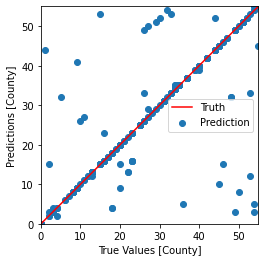

In [26]:
import matplotlib.pyplot as plt
truth_plot(truth, predic, savepath='')

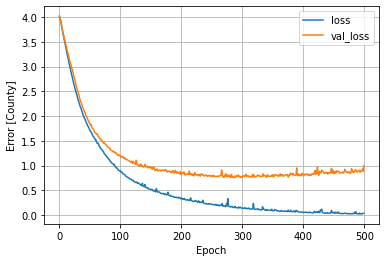

In [27]:
plot_loss(history)

In [28]:
model.save('/Users/Rachel/Desktop/class/Projects/model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /Users/Rachel/Desktop/class/Projects/model\assets


In [29]:
confusion_matrix(truth, predic)

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 2],
       [0, 0, 0, ..., 0, 0, 2]], dtype=int64)

In [30]:
f1_score(truth, predic, average='weighted')

0.8319685690360198

## Predict county with next fire

AcresBurned, Latitude, Longitude, Month, Year,Location, Rainfall, MinTemp, MaxTemp, AvgTemp

In [34]:
              # Acres, Month, Year, Rain, Min, Max, Avg Temps
guess = np.array((1000,  10,  2021,  10,   57,  82,  70))
guess = guess.reshape(1,-1)
scaled_guess = scaler.transform(guess)
prediction = model.predict(scaled_guess)
prediction = prediction.argmax(axis=1)
prediction_labels = get_names(prediction)
print(prediction_labels)

['Riverside']
